# Рынок заведений общественного питания Москвы

## Описание проекта
Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой.   Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?  
Партнёры просят нас подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.  

### План работ

#### Шаг №1. Загрузить данные и подготовить их к анализу

Загрузить данные о заведениях общественного питания Москвы. Убедиться, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработать их.  

#### Шаг №2. Анализ данных

- [Исследовать соотношение видов объектов общественного питания по количеству.](#n_object_types)
- [Исследовать соотношение сетевых и несетевых заведений по количеству.](#n_chain)
- [Для какого вида объекта общественного питания характерно сетевое распространение?](#chain_object)
- [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#chain_pattern)
- [Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?](#mean_n_seats) 

Выделить в отдельный столбец информацию об улице из столбца address.
- [Построить график топ-10 улиц по количеству объектов общественного питания.](#top_10_street) Воспользоваться [внешней информацией](#outside_info) и ответить на вопрос — [в каких районах Москвы находятся эти улицы?](top_district)
- [Найти число улиц с одним объектом общественного питания.](#one_object) Воспользоваться [внешней информацией](#outside_info) и ответить на вопрос — [в каких районах Москвы находятся эти улицы?](#one_object)
- [Посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.](#top_seats)
- [Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети.](#conclusion)  

#### Шаг №3. Подготовка презентации

__Презентация [здесь](restaurant_market_moscow.pdf).__

### Описание данных

Таблица rest_data:
- ___id___ — индивидуальный номер объекта общественного питания;
- ___object_name___ — название объекта общественного питания;
- ___chain___ — сетевой ресторан;
- ___object_type___ — тип объекта общественного питания;
- ___address___ — адрес;
- ___number___ — количество посадочных мест.

## Подготовка данных к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("Accent")
from io import BytesIO
import requests
import re
import itertools
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

In [2]:
df = pd.read_csv('../../datasets/rest_data.csv')
df['object_name'] = df['object_name'].str.lower()
df.set_axis(['id', 'object_name', 'chain', 'object_type', 'address', 'seats_number'],axis='columns',inplace=True)
print(df.isna().sum())
df = df.drop_duplicates(subset=['object_name', 'address']).reset_index(drop=True)
df.info()
df.head()

id              0
object_name     0
chain           0
object_type     0
address         0
seats_number    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15141 entries, 0 to 15140
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            15141 non-null  int64 
 1   object_name   15141 non-null  object
 2   chain         15141 non-null  object
 3   object_type   15141 non-null  object
 4   address       15141 non-null  object
 5   seats_number  15141 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 709.9+ KB


,id,object_name,chain,object_type,address,seats_number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


##### Комментарий:  

Данные загружены типы данных корректны, пропусков нет, дубликаты удалены.

## Анализ данных

<a name='n_object_types'></a>
___Посмотрим на соотношение видов объектов общественного питания к их количеству.___

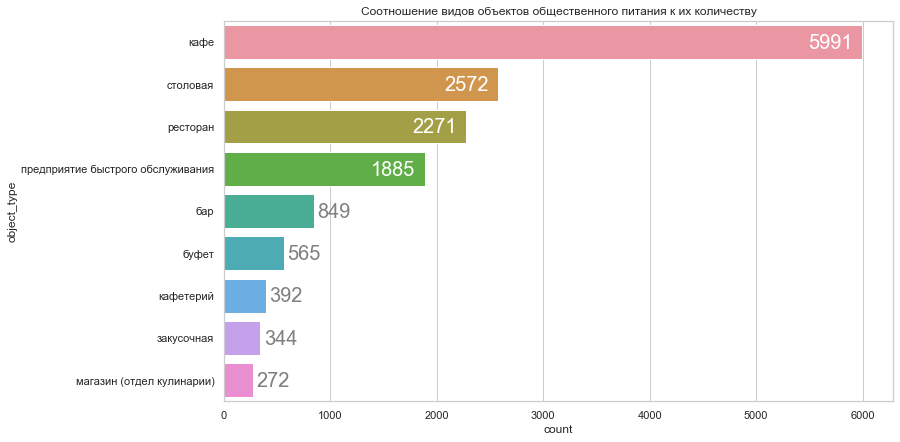

In [3]:
plt.figure(figsize=(12, 7))
order = df['object_type'].value_counts().index
ax = sns.countplot(y="object_type", data=df, order=order)
ax.set_title('Cоотношение видов объектов общественного питания к их количеству')
for i in ax.patches:
    if i.get_width() > 900:
        ax.text(i.get_width()-500, i.get_y()+0.55, 
                str(round(i.get_width(), 1)), fontsize=20, color='white')
    else:
        ax.text(i.get_width()+30, i.get_y()+0.55, 
                str(round(i.get_width(), 1)), fontsize=20, color='grey')
plt.show()

<a name='n_chain'></a>
___Посмотрим на соотношение сетевых и не сетевых заведений по количеству.___

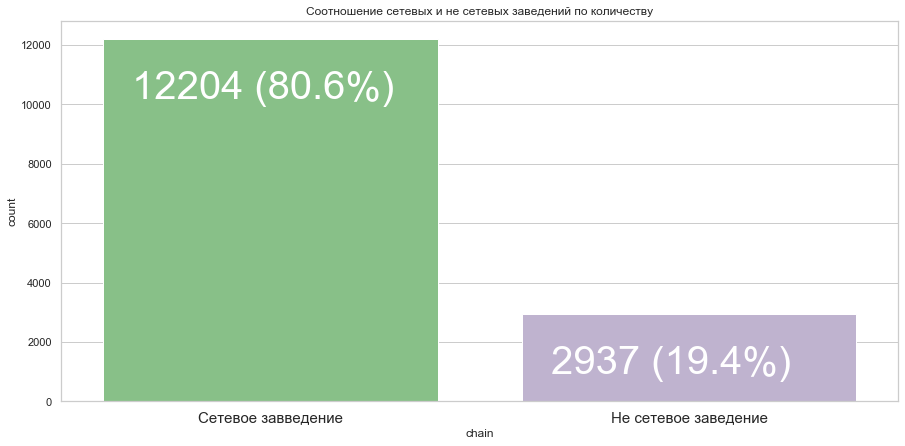

0.19397661977412325

In [4]:
plt.figure(figsize=(15, 7))
chain_part = (df.replace({'да': True, 'нет': False})['chain'].mean())
ax= sns.countplot(x="chain", data=df)
ax.set_title('Соотношение сетевых и не сетевых заведений по количеству')
ax.set_xticklabels(['Сетевое завведение', 'Не сетевое заведение'], size = 15)
for i, v in enumerate(ax.patches):
    if i > 0:
        ax.text(v.get_x()+.07, v.get_height()-2000, 
            str(v.get_height())+' ({:.1%})'.format(chain_part), fontsize=40, color='white')
    else:
        ax.text(v.get_x()+.07, v.get_height()-2000, 
            str(v.get_height())+' ({:.1%})'.format(1 - chain_part), fontsize=40, color='white')
plt.show()
chain_part

##### Комментарий:

81% заведений в Москве не являются сетевыми. В такой конкурентной среде масштабировать бизнес не просто.

<a name='chain_object'></a>
___Для какого вида объекта общественного питания характерно сетевое распространение?___

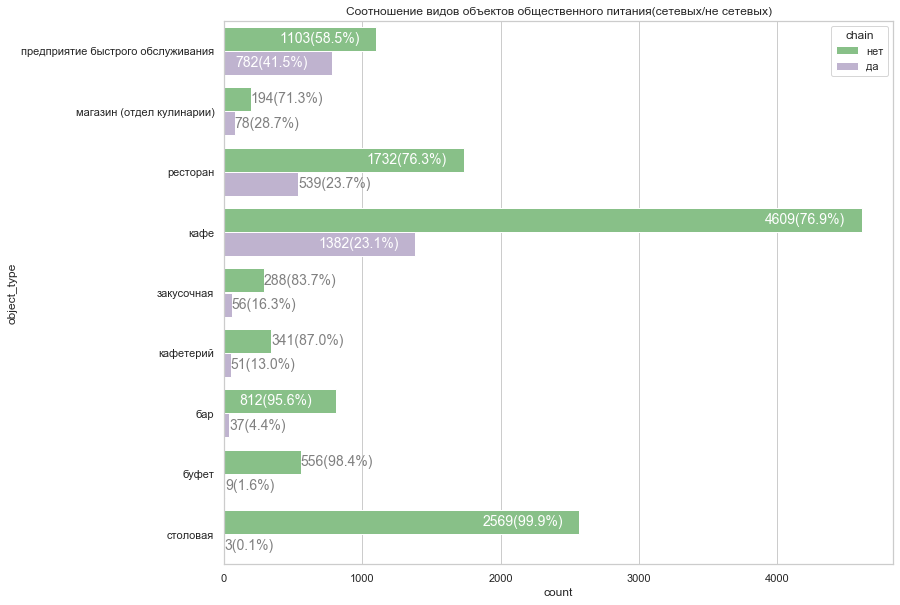

In [5]:
plt.figure(figsize=(12, 10))
chain_part = (df.replace({'да': True, 'нет': False})
         .groupby('object_type')['chain']
         .agg('mean').reset_index()
         .sort_values('chain', ascending=False).reset_index(drop=True))
order = (chain_part['object_type'])
ax = sns.countplot(y="object_type", hue='chain', data=df, order=order)
ax.set_title('Соотношение видов объектов общественного питания(сетевых/не сетевых)')
for i, v in enumerate(ax.patches):
    if i > 8:
        if v.get_width() > 700:
            ax.text(v.get_width()-700, v.get_y()+0.26, 
                str(v.get_width())+'({:.1%})'.format(chain_part['chain'][i-9]), fontsize=14, color='white')
        else:
            ax.text(v.get_width(), v.get_y()+0.26, 
                str(v.get_width())+'({:.1%})'.format(chain_part['chain'][i-9]), fontsize=14, color='grey')
    else:
        if v.get_width() > 700:
            ax.text(v.get_width()-700, v.get_y()+0.26, 
                str(v.get_width())+'({:.1%})'.format(1 - chain_part['chain'][i]), fontsize=14, color='white')
        else:
            ax.text(v.get_width(), v.get_y()+0.26, 
                str(v.get_width())+'({:.1%})'.format(1 - chain_part['chain'][i]), fontsize=14, color='grey')
plt.show()

##### Комментарий:

Сетевое распространение наиболее характерно для предприятий быстрого обслуживания

<a name='chain_pattern'></a>
___Посмотрим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?___

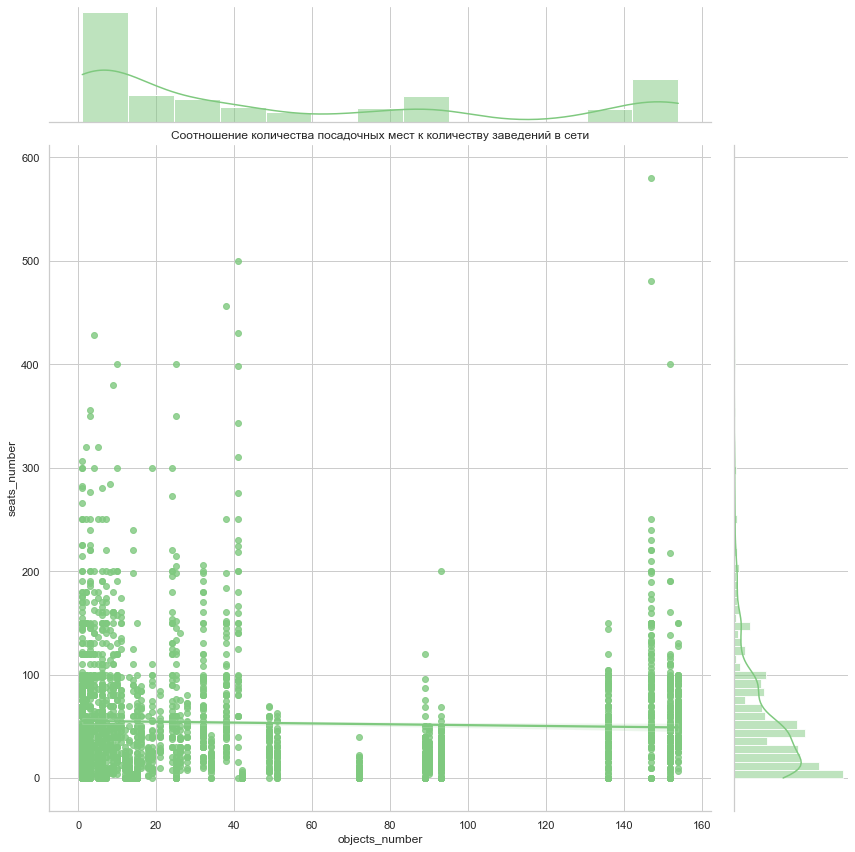

In [6]:
df_chain = df[df['chain'] == 'да']
df_chain_grouped = df_chain.groupby('object_name').agg({'id': 'count'}).reset_index()
df_chain_grouped.columns= ['object_name', 'objects_number']
df_chain = df_chain.merge(df_chain_grouped, on='object_name')

ax = sns.jointplot(x="objects_number", y="seats_number", data=df_chain, kind='reg', height=12)
plt.title('Соотношение количества посадочных мест к количеству заведений в сети')
plt.show()

##### Комментарий:

Большинство сетей, в не зависимости от количества заведений, обладает не большим количеством посадочных мест (до 100).

<a name='mean_n_seats'></a>
___Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?___

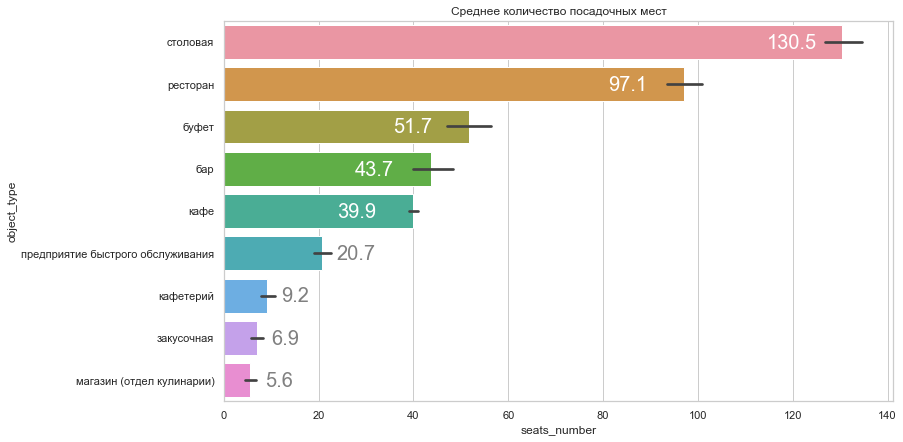

In [7]:
plt.figure(figsize=(12, 7))
order = (df.groupby('object_type')['seats_number']
         .agg('mean').reset_index()
         .sort_values('seats_number', ascending=False)['object_type'])
ax = sns.barplot(x="seats_number", y='object_type', data=df, order=order)
ax.set_title('Cреднее количество посадочных мест')
for i in ax.patches:
    if i.get_width() > 25:
        ax.text(i.get_width()-16, i.get_y()+0.55, 
                str(round(i.get_width(), 1)), fontsize=20, color='white')
    else:
        ax.text(i.get_width()+3, i.get_y()+0.55, 
                str(round(i.get_width(), 1)), fontsize=20, color='grey')

plt.show()

##### Комментарий:

- Больше всего посадочных мест в столовых, в среднем, 131.
- В ресторанах тоже большое количество посадочных мест, в среднем, 97.
- В буфетах, в среднем, 52 посадочных места.
- В барах, в среднем, 44 посадочных места.
- В кафе, в среднем, 40 посадочных мест.
- В предприятиях быстрого обслуживания, в среднем, 21 посадочное место.
- В кафетериях, в среднем, 9 посадочных мест.
- В закусочных, в среднем, 7 посадочных мест.
- В магазинах (отдел кулинарии), в среднем, 6 посадочных мест.

<a name='outside_info'></a>
___Чтобы выяснить в каких районах находятся наиболее/наименее популярные улицы воспользуемся внешней информацией:___

In [8]:
spreadsheet_id = '1xaOf4-lzoc5Xpc1EZVZgH36n1eyVazOoiCvp6xRdqsw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content))

streets.columns = streets.columns.str.lower()
streets = streets.loc[:,['um_namef', 'um_te']]
streets.columns = ['street', 'kod']
streets['kod'] = streets['kod'].str.split(';')


spreadsheet_id = '10TF-ICXE-AjHFD4Ud4U4-9vv_gFS4bUL2EZuCdwxdiA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts = pd.read_csv(BytesIO(r.content))

districts.columns = districts.columns.str.lower()
districts = districts.loc[:,['kod', 'name']]
streets.head()
print(districts.head())
streets.head()

   kod                                name
0  100  Центральный административный округ
1  101                         район Арбат
2  102                     Басманный район
3  103                 район Замоскворечье
4  104                Красносельский район


,street,kod
0,1-й Ирининский переулок,[0102]
1,2-й Ирининский переулок,[0102]
2,3-й Ирининский переулок,[0102]
3,Иркутская улица,[0406]
4,1-й Иртышский проезд,[0406]


##### Комментарий

Для определения района в котором находятся заведения, мы загрузили данные по улицам Москвы (таблица streets, источник: https://data.mos.ru/classifier/2044) и данные по районам Москвы (таблица districts, источник: https://data.mos.ru/classifier/7710168515-obshchemoskovskiy-klassifikator-territorialnyh-edinits-moskvy-omk-002-2013-razdel-1)

___Теперь объединим эти две таблицы с внешними данными и получим таблицу типа (улица - районы в которых она пролегает):___

In [9]:
def find_district(row):
    dists = []
    for i in row:
        dist = districts[districts['kod'] == int(i)]['name']
        dists.append(dist)
    return dists

def find_region(row):
    regs = []
    cods = []
    for i in row:
        cod = int(i[1]+'00')
        if (not cods) or (cod not in cods):
            reg = districts[districts['kod'] == cod]['name']
            regs.append(reg)
            cods.append(cod)
    return regs

streets['district'] = streets['kod'].apply(find_district)
streets['district'] = (streets['district']
                       .map(lambda lst: list(itertools.chain(*lst)))) # развертывание вложенных списков в линейный
streets['region'] = streets['kod'].apply(find_region)
streets['region'] = (streets['region']
                       .map(lambda lst: list(itertools.chain(*lst)))) # развертывание вложенных списков в линейный
streets = streets.loc[:,['street', 'district', 'region']]
streets.head()

,street,district,region
0,1-й Ирининский переулок,[Басманный район],[Центральный административный округ]
1,2-й Ирининский переулок,[Басманный район],[Центральный административный округ]
2,3-й Ирининский переулок,[Басманный район],[Центральный административный округ]
3,Иркутская улица,[район Гольяново],[Восточный административный округ]
4,1-й Иртышский проезд,[район Гольяново],[Восточный административный округ]


<a name='top_10_street'></a>
___Построим график топ-10 улиц по количеству объектов общественного питания:___

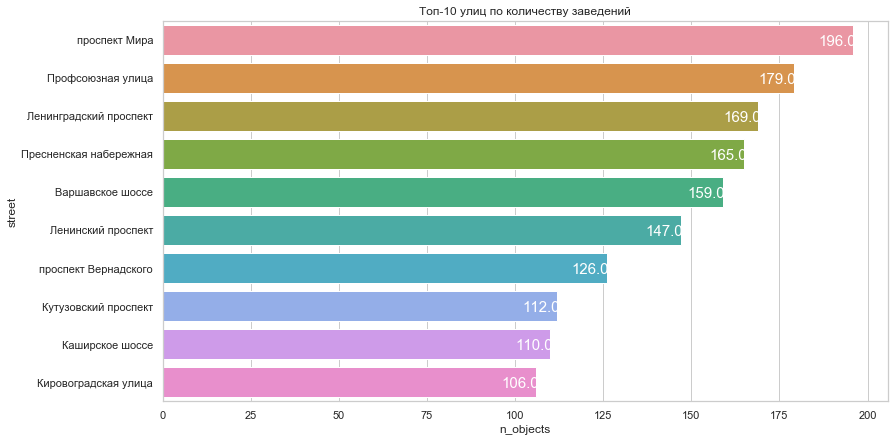

In [10]:
df['street'] = df['address'].str.split(', ', expand=True)[1]
top_street =df.groupby('street')['id'].agg('nunique').reset_index()
top_street.columns = ['street', 'n_objects']
not_moscow = ['город Зеленоград', 'поселение Сосенское']
top_10_street = (top_street.query('street not in @not_moscow')
                 .sort_values('n_objects', ascending=False)
                 .reset_index(drop=True)
                 .head(10))
top_10_street = top_10_street.merge(streets, how='left', on='street')


plt.figure(figsize=(13, 7))
ax = sns.barplot(x="n_objects", y='street', data=top_10_street)
ax.set_title('Топ-10 улиц по количеству заведений')
for i in ax.patches:
    ax.text(i.get_width()-10, i.get_y()+0.55, 
            str(round(i.get_width())), fontsize=15, color='white')
plt.show()

<a name='top_district'></a>
___Теперь посмотрим на районы в которых эти улицы находятся:___

In [11]:
top_10_street

,street,n_objects,district,region
0,проспект Мира,196,"[Мещанский район, Алексеевский район, район Марьина Роща, Останкинский район, район Ростокино, район Свиблово, Яросл...","[Центральный административный округ, Северо-Восточный административный округ]"
1,Профсоюзная улица,179,"[Академический район, район Коньково, Обручевский район, район Тёплый Стан, район Черёмушки, район Ясенево]",[Юго-Западный административный округ]
2,Ленинградский проспект,169,"[район Аэропорт, район Беговой, район Сокол, Хорошёвский район]",[Северный административный округ]
3,Пресненская набережная,165,[Пресненский район],[Центральный административный округ]
4,Варшавское шоссе,159,"[Донской район, район Нагатино-Садовники, Нагорный район, район Чертаново Северное, район Чертаново Центральное, рай...","[Южный административный округ, Юго-Западный административный округ, Центральный административный округ]"
5,Ленинский проспект,147,"[район Якиманка, Донской район, Гагаринский район, Ломоносовский район, Обручевский район, район Тёплый Стан, район ...","[Центральный административный округ, Южный административный округ, Юго-Западный административный округ, Западный адм..."
6,проспект Вернадского,126,"[Гагаринский район, Ломоносовский район, район Проспект Вернадского, район Раменки, район Тропарёво-Никулино]","[Юго-Западный административный округ, Западный административный округ]"
7,Кутузовский проспект,112,"[район Дорогомилово, район Фили-Давыдково]",[Западный административный округ]
8,Каширское шоссе,110,"[район Москворечье-Сабурово, район Нагатино-Садовники, район Орехово-Борисово Северное, район Орехово-Борисово Южное]",[Южный административный округ]
9,Кировоградская улица,106,"[район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное]",[Южный административный округ]


##### Комментарий:

Большинство улиц из списка топ-10 проходят через несколько районов (от центра и до окраин города), возможно делать выводы о наиболее популярном районе по улице возможно не лучшая идея.

<a name='one_object'></a>
___Найдём число улиц с одним объектом общественного питания:___

При анализе данных выявленно 580 улиц с одним объектом общественного питания.

Большинство из этих улиц расположено в следующих районах:



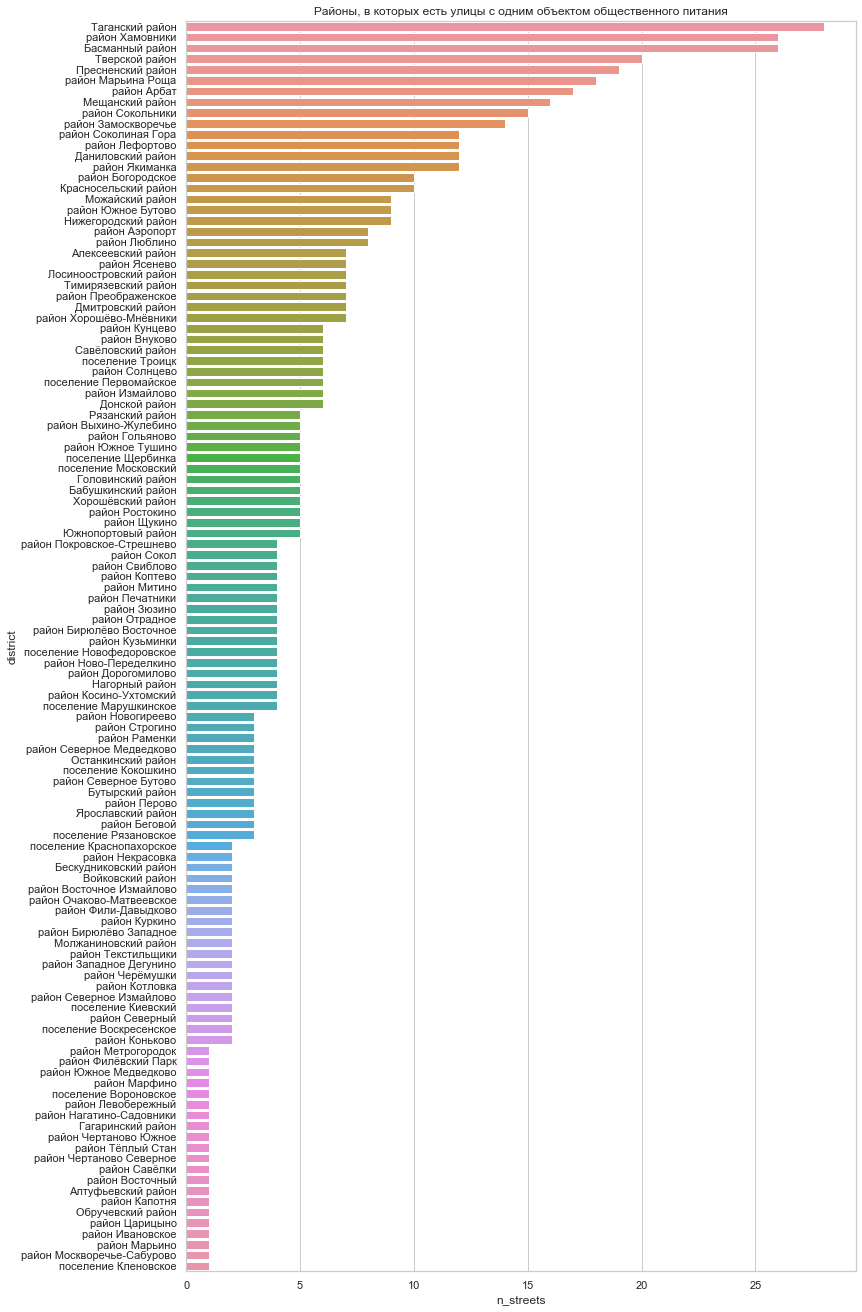

In [12]:
one_object = top_street[top_street['n_objects'] == 1]
print('При анализе данных выявленно {} улиц с одним объектом общественного питания.'.format(len(one_object)))
print('')
print('Большинство из этих улиц расположено в следующих районах:')
one_object = one_object.merge(streets, how='left', on='street')
one_object = one_object.dropna()
print()
disticts_with_one_objects_streets = (pd.DataFrame(
    list(itertools.chain(*one_object['district'])),columns=['district'])['district']
                                     .value_counts().reset_index())
disticts_with_one_objects_streets.columns = ['district', 'n_streets']
plt.figure(figsize=(12, 23))
ax = sns.barplot(x="n_streets", y='district', data=disticts_with_one_objects_streets)
ax.set_title('Районы, в которых есть улицы с одним объектом общественного питания')

plt.show()

##### Комментарий:

Районов с улицами, где всего одно заведение тоже очень много, в этот список также входят районы с улицами, где наибольшее количество заведений. И это тоже наводит на мысль, что поиск идеального района для открытия нового ресторана по количеству заведений на улицах, не самая хорошая идея.

___Попробуем посмотреть на распределение улиц с одним объектом общественного питания среди административных округов:___

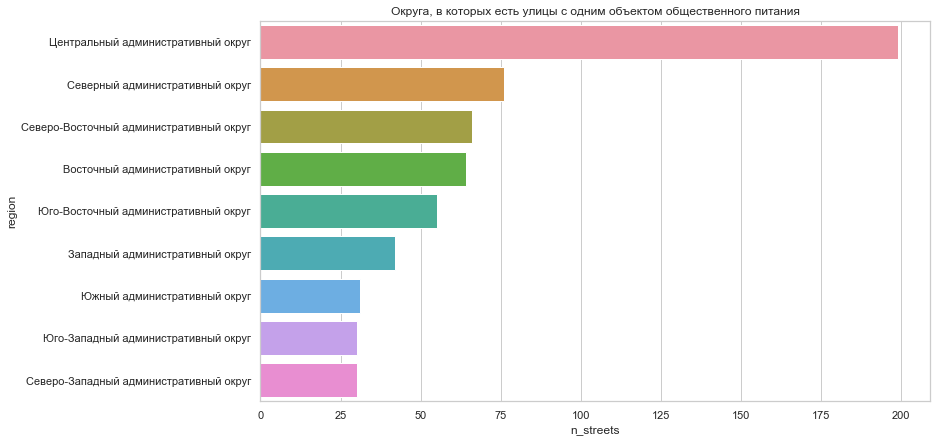

In [13]:
regions_with_one_objects_streets = (pd.DataFrame(
    list(itertools.chain(*one_object['region'])),columns=['region'])['region']
                                     .value_counts().reset_index())
regions_with_one_objects_streets.columns = ['region', 'n_streets']
plt.figure(figsize=(12, 7))
ax = sns.barplot(x="n_streets", y='region', data=regions_with_one_objects_streets)
ax.set_title('Округа, в которых есть улицы с одним объектом общественного питания')

plt.show()

##### Комментарий:

Улицы с одним объектом общественного питания есть во всех административных округах, но в ЦАО их намного больше.

<a name='top_seats'></a>
___Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания:___

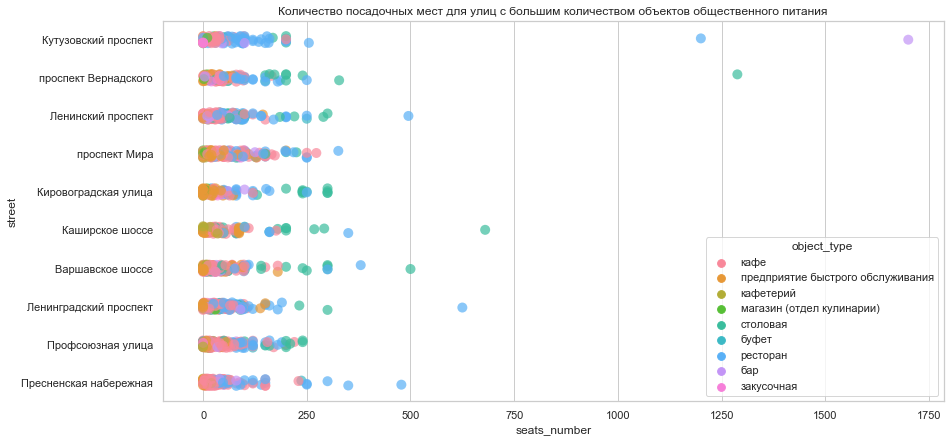

In [14]:
df.query('street in @top_10_street.street')
plt.figure(figsize=(14,7))
order = (df.query('street in @top_10_street.street')
         .groupby('street')['seats_number']
         .agg('mean').reset_index()
         .sort_values('seats_number', ascending=False)['street'])
ax = sns.stripplot(x="seats_number", y='street', hue='object_type', data=df.query('street in @top_10_street.street'),
                   order=order, alpha=.7,size=10)
ax.set_title('Количество посадочных мест для улиц с большим количеством объектов общественного питания')

plt.show()


#####  Комментарий:

На улицах с большим количеством объектов общественного питания, преобладают заведения с небольшим количеством мест, за исключением столовых, некоторых ресторанов и не значительных исключениях в барах и кафе в заведениях до 100 мест в среднем даже меньше 50.

### Вывод:

В данном разделе мы пытались найти идеальное место для открытия нашего кафе, идея с поиском "золотого района" оказалась неудачной. Зато мы выяснили, что наиболее популярным округом среди москвичей, любящих поесть, попить, выпить и просто хорошо провести время вне домашнего уюта, является ЦАО. К тому же узнали сколько посадачных мест у наших конкурентов.

## Общий вывод
<a name='conclusion'></a>

Проведено исследование рынка, используя открытые данные о заведениях общественного питания в Москве.   
В ходе анализа мы:
- [Исследовали соотношение видов объектов общественного питания по количеству.](#n_object_types)
- [Исследовали соотношение сетевых и несетевых заведений по количеству.](#n_chain)
- [Определили для какого вида объекта общественного питания характерно сетевое распространение?](#chain_object)
- [Узнали, что для сетевых заведений характерно, в не зависимости от количества заведений, не большое количество посадочных мест](#chain_pattrn)
- [Описали среднее количество посадочных мест для каждого вида объекта общественного питания.](#mean_n_seats) 
- [Построили график топ-10 улиц по количеству объектов общественного питания.](#top_10_street) И посмотрели [в каких районах Москвы находятся эти улицы.](top_district)
- [Узнали в каких районах и округах Москвы находятся улицы всего с одним объектом общественного питания.](#one_object)
- [А также посмотрели на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.](#top_seats)

__Анализируя полученные данные, наиболее предпочтительным будет вариант открыть объект общественного питания типа кафе; т.к. обслуживанием будут заниматься роботы, не знающие усталости, то заведение нужно открывать с большим количеством мест (при условии комфортного размещения гостей); открываться лучше в центральных районах, там большая конкуренция, но там и большое количество потенциальных гостей, которые будут рады инновационному типу заведения, и если качество сервиса и блюд будут на высоком уровне, то они останутся нашими постоянными гостями на долгие годы. В случае успеха бизнес можно будет легко масштабировать на другие округа столицы, а в дальнейшем и на другие города.__ 
_____

__Презентация [здесь](restaurant_market_moscow.pdf).__